In [1]:
#MLP predict closing stock price of a corporation (Apple). We 'll be using the past 60 day stock price. 

In [2]:
#import libraries
import math
import pandas_datareader as web
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error
from keras.utils import plot_model
plt.style.use('fivethirtyeight')

In [3]:
#get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2010-01-01', end='2020-08-20')
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.604801
2010-01-05,7.699643,7.616071,7.664286,7.656428,601904800.0,6.616219
2010-01-06,7.686786,7.526786,7.656428,7.534643,552160000.0,6.510980
2010-01-07,7.571429,7.466072,7.562500,7.520714,477131200.0,6.498945
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.542150
...,...,...,...,...,...,...
2020-08-14,115.000000,113.044998,114.830002,114.907501,165565200.0,114.907501
2020-08-17,116.087502,113.962502,116.062500,114.607498,119561600.0,114.607498
2020-08-18,116.000000,114.007500,114.352501,115.562500,105633600.0,115.562500


In [4]:
#get the number of rows and columns in the data set
df.shape

(2677, 6)

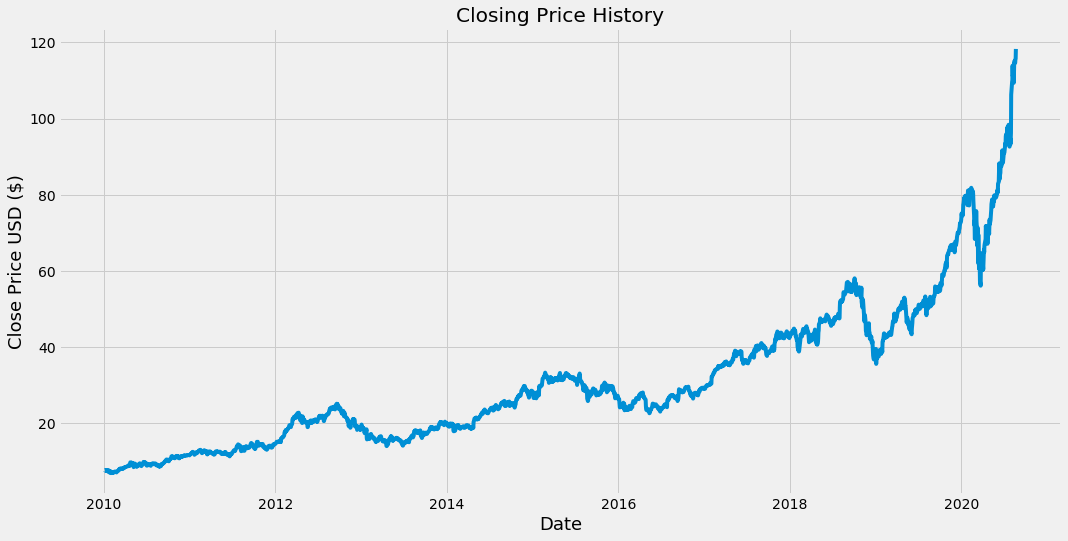

In [5]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
#create a new dataframe with only the "Close column"
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on (80%)
training_data_len = math.ceil(len(dataset)*.8)

training_data_len 

2142

In [7]:
#Scale the data
scaler =  MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00703925],
       [0.00715785],
       [0.00606478],
       ...,
       [0.97565431],
       [0.9769557 ],
       [1.        ]])

In [8]:
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([7.03924959e-03, 7.15785107e-03, 6.06478041e-03, 5.93976781e-03,
       6.38853780e-03, 5.78911071e-03, 5.02299872e-03, 5.96220673e-03,
       5.57113684e-03, 4.44921612e-03, 7.36941383e-03, 6.30839878e-03,
       5.13518908e-03, 1.82712704e-03, 3.53244704e-03, 4.45242168e-03,
       5.07428770e-03, 2.32077062e-03, 3.20556112e-06, 8.59068982e-04,
       1.22128883e-03, 2.30153725e-03, 0.00000000e+00, 1.09307066e-03,
       6.63534033e-04, 1.32707235e-03, 9.84085866e-04, 2.12203011e-03,
       2.67016822e-03, 3.63822628e-03, 3.36576214e-03, 3.48756918e-03,
       3.08367704e-03, 2.68299046e-03, 1.60594760e-03, 2.75992393e-03,
       3.18946056e-03, 4.02929618e-03, 5.43009643e-03, 5.38521857e-03,
       5.53908123e-03, 5.98144010e-03, 8.62276255e-03, 8.66443056e-03,
       9.92739597e-03, 1.05107910e-02, 1.07223580e-02, 1.10749612e-02,
       1.01902434e-02, 1.03857784e-02, 1.02799991e-02, 1.04498896e-02,
       9.68057204e-03, 1.04819452e-02, 1.16391228e-02, 1.19628802e-02,
     

In [9]:
#convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data (MLP expects 2 dimentionals)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]))
x_train.shape


(2082, 60)

In [10]:
#build MLP model
model = Sequential()
model.add(Dense(150, activation='relu', input_dim = 60))
model.add(Dense(150, activation='relu'))
model.add(Dense(1))
model.summary()


Model: &quot;sequential&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               9150      
_________________________________________________________________
dense_1 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 151       
Total params: 31,951
Trainable params: 31,951
Non-trainable params: 0
_________________________________________________________________


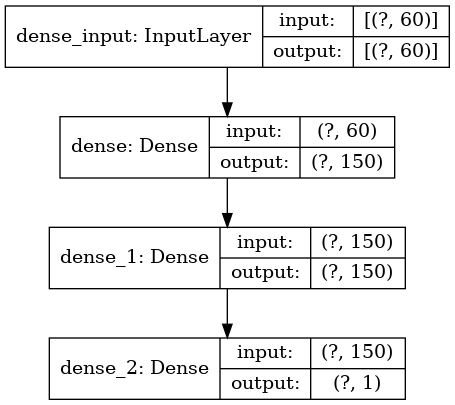

In [11]:
plot_model(model, to_file='modelapple.png', show_shapes=True)

In [12]:
#compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#train the model
history = model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
2082/2082 [==============================] - 1s 719us/step - loss: 3.8194e-04
Epoch 2/20
2082/2082 [==============================] - 1s 710us/step - loss: 1.5268e-04
Epoch 3/20
2082/2082 [==============================] - 1s 697us/step - loss: 1.1089e-04
Epoch 4/20
2082/2082 [==============================] - 1s 696us/step - loss: 1.0191e-04
Epoch 5/20
2082/2082 [==============================] - 1s 713us/step - loss: 8.9812e-05
Epoch 6/20
2082/2082 [==============================] - 2s 723us/step - loss: 8.0214e-05
Epoch 7/20
2082/2082 [==============================] - 1s 695us/step - loss: 7.7510e-05
Epoch 8/20
2082/2082 [==============================] - 1s 695us/step - loss: 7.1669e-05
Epoch 9/20
2082/2082 [==============================] - 1s 686us/step - loss: 6.3171e-05
Epoch 10/20
2082/2082 [==============================] - 1s 696us/step - loss: 6.1283e-05
Epoch 11/20
2082/2082 [==============================] - 1s 704us/step - loss: 5.4806e-05
Epoch 12/20
2082/20

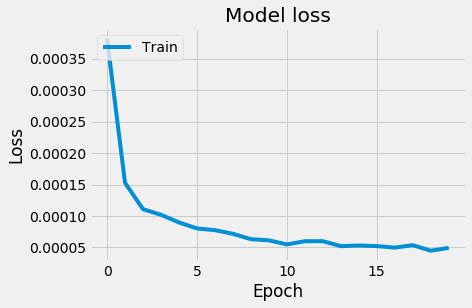

In [14]:
#show model loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [15]:
#create the testing data set
#create a new array containing scaled values from index 
test_data = scaled_data[training_data_len - 60: , : ]
#create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [16]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [17]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]))

In [18]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [19]:
#get the root mean squared error (RMSE) (lower values better fit)
rmse = np.sqrt( np.mean( predictions - y_test)**2)
print(rmse)

1.2537169411917712


In [20]:
#get the mean absolute error (average of the forecast error values - all of em forced to be positive)
mae = mean_absolute_error(y_test, predictions)
print(mae)

1.6045889025536653


In [21]:
#define MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#get MAPE
mape = mean_absolute_percentage_error(y_test, predictions)
print(mape)

2.7782684071520456


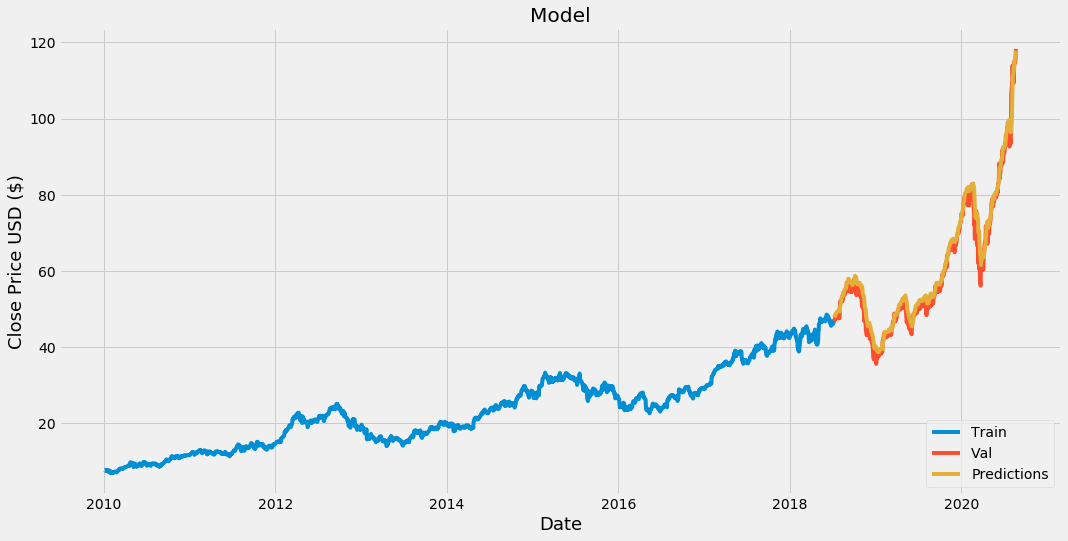

In [22]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

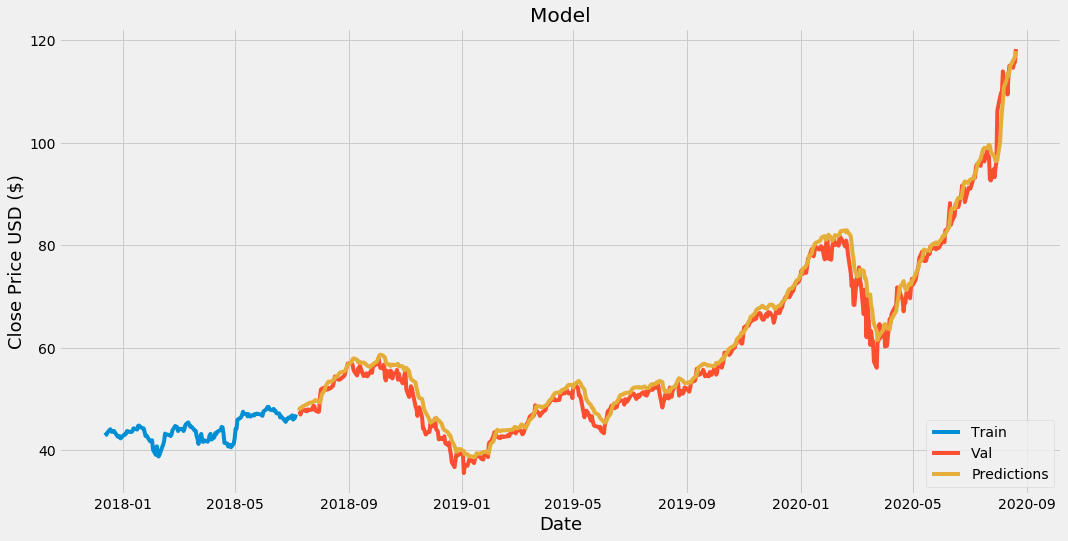

In [23]:
#plot zoomed in
train = data[2000:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [24]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-07-09,47.645000,47.777382
2018-07-10,47.587502,48.084171
2018-07-11,46.970001,48.264824
2018-07-12,47.757500,48.261890
2018-07-13,47.832500,48.557251
...,...,...
2020-08-14,114.907501,114.928070
2020-08-17,114.607498,115.986656
2020-08-18,115.562500,116.364883


In [25]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2010-01-01', end='2020-08-19')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
 

[[117.85108]]


In [26]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-08-20', end='2020-08-20')
print(apple_quote2['Close'])

Date
2020-08-20    118.275002
Name: Close, dtype: float64
